In [1]:
from sklearn import datasets  
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt

take a look at the data

In [2]:
iris = datasets.load_iris() 
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Transform target

In [3]:
k=[]
for i in iris['target']:
  k1=[]
  for j in range(3):
    if j==i:
      k1.append(1)
    else:
      k1.append(0)

  k.append(k1)

K=np.array(k).astype('float64')

define layer

In [4]:
class Layer:
  def __init__(self,init_w,init_b):
    self.w=tf.Variable(init_w,dtype='float64')
    self.b=tf.Variable(init_b,dtype='float64')

  def compute(self,x):
    result=tf.sigmoid(tf.matmul(x,self.w)+self.b) #n*4, 4*3
    output=tf.argmax(result,axis=1)
    return result, output



define batchify code

In [5]:
def batch(size):
  r=[]
  j=0
  while j<size:
    x=random.randint(0,len(iris['target'])-1)
    if x not in r:
      r.append(x)
      j=j+1

  new_input=[]
  new_target=[]
  new_k=[]
  for i in r:
    new_input.append(iris['data'][i].astype('float64'))
    new_target.append(iris['target'][i])
    new_k.append(K[i].astype('float64'))

  return np.array(new_input,dtype='float64'),np.array(new_target,dtype=int),np.array(new_k,dtype='float64')

initialise w and b

In [6]:
w=np.random.normal(0, 1, (4, 3)).astype('float64')
b=np.array([0,0,0]).astype('float64')

define loss and error function

In [7]:
def error(output,target):
  return tf.reduce_sum(tf.cast(tf.not_equal(output,target),tf.int32))

def cost(output,target):
  return tf.reduce_sum(tf.math.log(output)*target)

Test

In [8]:
layer=Layer(w,b)
input,target,k_prime=batch(20)
raw,output=layer.compute(input)
print(output)
print("Loss: ", cost(raw,k_prime))
print("Error: ", error(output,target))

tf.Tensor([1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1], shape=(20,), dtype=int64)
Loss:  tf.Tensor(-86.39168147316957, shape=(), dtype=float64)
Error:  tf.Tensor(13, shape=(), dtype=int32)


Define HP

In [9]:
EPOCH=1000
alpha=0.01
batch_size=2

One epoch training

In [10]:
def train(layer,input,target):
  raw,output=layer.compute(input)
  delta_j=-(target-raw) #n*3
  layer.w=layer.w-alpha*tf.matmul(tf.transpose(input),delta_j) #4*n,n*3
  layer.b=layer.b-alpha*delta_j

  return layer

start training for different batch sizes

In [11]:
all_loss=[]
all_error=[]
for batch_size in [ 2, 4, 8, 16, 24, 32, 48, 64]:
  l=Layer(w,b)
  loss=[]
  e=[]
  for i in range(EPOCH):
    input,target,k_prime=batch(batch_size)
    l=train(l,input,k_prime)

    raw,output=l.compute(input)
    loss.append(-1*cost(raw,k_prime))
    e.append(error(output,target))
    if i%100 == 0:
      print("epoch: ",i, end=" ")
      print("Loss: ", -1*cost(raw,k_prime).numpy(), end=" ")
      print("Error: ", error(output,target).numpy())
    
    all_loss.append(loss)
    all_error.append(e)
  

epoch:  0 Loss:  3.120164365798168 Error:  1
epoch:  100 Loss:  0.6181970876913963 Error:  0
epoch:  200 Loss:  0.9260603623792948 Error:  1
epoch:  300 Loss:  1.3426063490354374 Error:  1
epoch:  400 Loss:  1.201908411287935 Error:  0
epoch:  500 Loss:  0.44421001321991377 Error:  0
epoch:  600 Loss:  0.7414067817588035 Error:  0
epoch:  700 Loss:  0.4778591424089762 Error:  0
epoch:  800 Loss:  0.9501885964452718 Error:  1
epoch:  900 Loss:  0.47662587237590864 Error:  0
epoch:  0 Loss:  3.595340012909312 Error:  1
epoch:  100 Loss:  0.9227985457060777 Error:  0
epoch:  200 Loss:  2.188986840797548 Error:  0
epoch:  300 Loss:  1.9959070292212058 Error:  2
epoch:  400 Loss:  1.5011803149904517 Error:  0
epoch:  500 Loss:  1.896450341165207 Error:  1
epoch:  600 Loss:  2.2743022886129474 Error:  1
epoch:  700 Loss:  1.4833398907658422 Error:  1
epoch:  800 Loss:  0.07323020600302184 Error:  0
epoch:  900 Loss:  0.2564408941004725 Error:  0
epoch:  0 Loss:  30.106319228515098 Error:  5


In [12]:
sizes= [ 2, 4, 8, 16, 24, 32, 48, 64]
for i in range(len( sizes)):
  avg_error=(tf.reduce_sum(all_error[i])/sizes[i]/EPOCH).numpy()
  avg_loss=(tf.reduce_sum(all_loss[i])/EPOCH).numpy()

  print("size: ", sizes[i], " average error: ", avg_error, " average loss: ", avg_loss)


size:  2  average error:  0.1255  average loss:  0.9372471414029869
size:  4  average error:  0.06275  average loss:  0.9372471414029869
size:  8  average error:  0.031375  average loss:  0.9372471414029869
size:  16  average error:  0.0156875  average loss:  0.9372471414029869
size:  24  average error:  0.010458333333333333  average loss:  0.9372471414029869
size:  32  average error:  0.00784375  average loss:  0.9372471414029869
size:  48  average error:  0.005229166666666667  average loss:  0.9372471414029869
size:  64  average error:  0.003921875  average loss:  0.9372471414029869


generally a larger batch size leads to a lower average error. Now we plot the graph and see the violatility

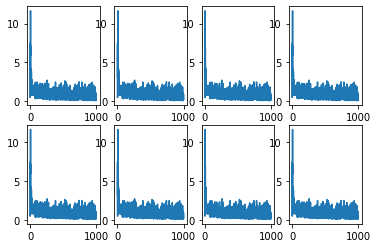

In [13]:
figure, axis = plt.subplots(2, 4)
for i in range(len( sizes)):
  if i<4:
    axis[0, i%4].plot([i for i in range(EPOCH)],all_loss[i])

  else:
    axis[1, i%4].plot([i for i in range(EPOCH)],all_loss[i])

plt.show()